# Exploratory Data Analysis

- Explore Dataset
 - Univariate Analysis
 - Bivariate Analysis
 - Multivariant Analysis
 - Time Series Analysis

In [1]:
import pandas as pd  # data manipulation, cleaning and analysis
import numpy as np   # numerical analysis
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # data visualization

from pathlib import Path


import warnings
warnings.filterwarnings("ignore")

In [2]:
CLEANED_DATASET_DIR = Path("../dataset/Algerian_forest_fires_CLEANED.csv")

df = pd.read_csv(CLEANED_DATASET_DIR)
df.head()

,DAY,MONTH,YEAR,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,CLASSES,REGION
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
# descriptive stats

df.describe()

,DAY,MONTH,YEAR,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,REGION
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


## Features Distribution

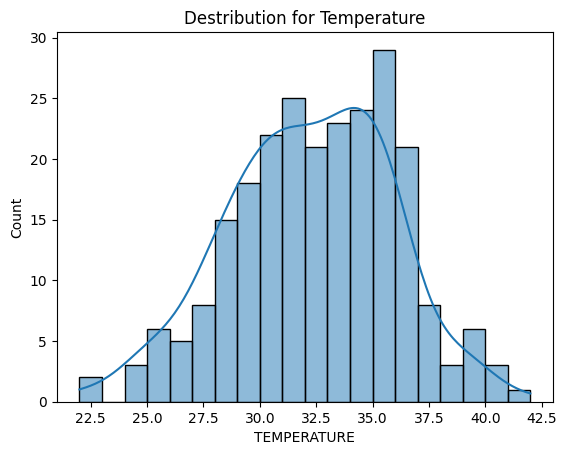

In [4]:
# plot histogram
sns.histplot(data=df["TEMPERATURE"], bins=20, kde=True)
plt.title("Destribution for Temperature")
plt.show()

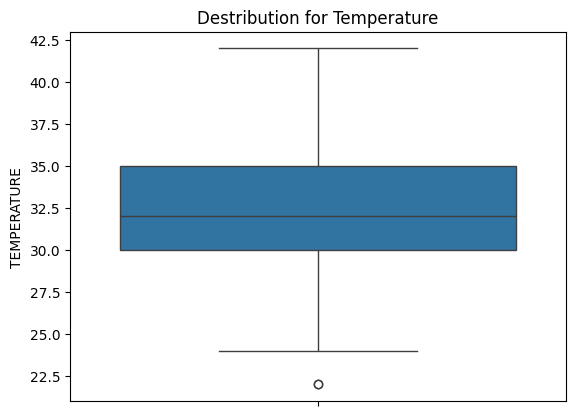

In [5]:
# boxplot histogram
sns.boxplot(data=df["TEMPERATURE"])
plt.title("Destribution for Temperature")
plt.show()

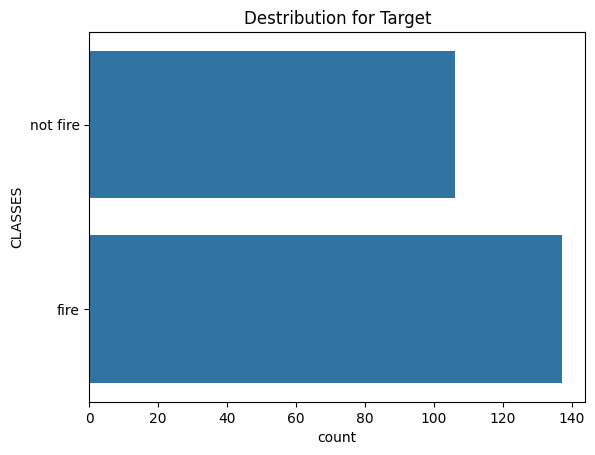

In [6]:
# classes
sns.countplot(data=df["CLASSES"])
plt.title("Destribution for Target")
plt.show()

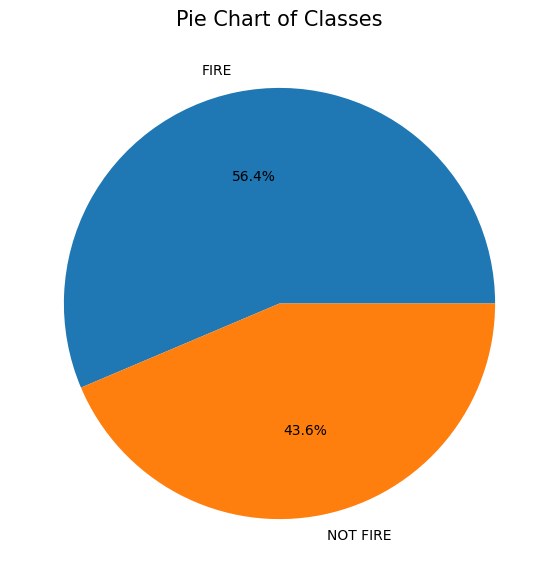

In [7]:
# plot a piechart
percentage = df["CLASSES"].value_counts(normalize=True) * 100
classes = ["FIRE", "NOT FIRE"]

plt.figure(figsize=(12, 7))
plt.pie(percentage, labels=classes, autopct="%1.1f%%")
plt.title("Pie Chart of Classes", fontsize=15)
plt.show()

# Multicollinearity

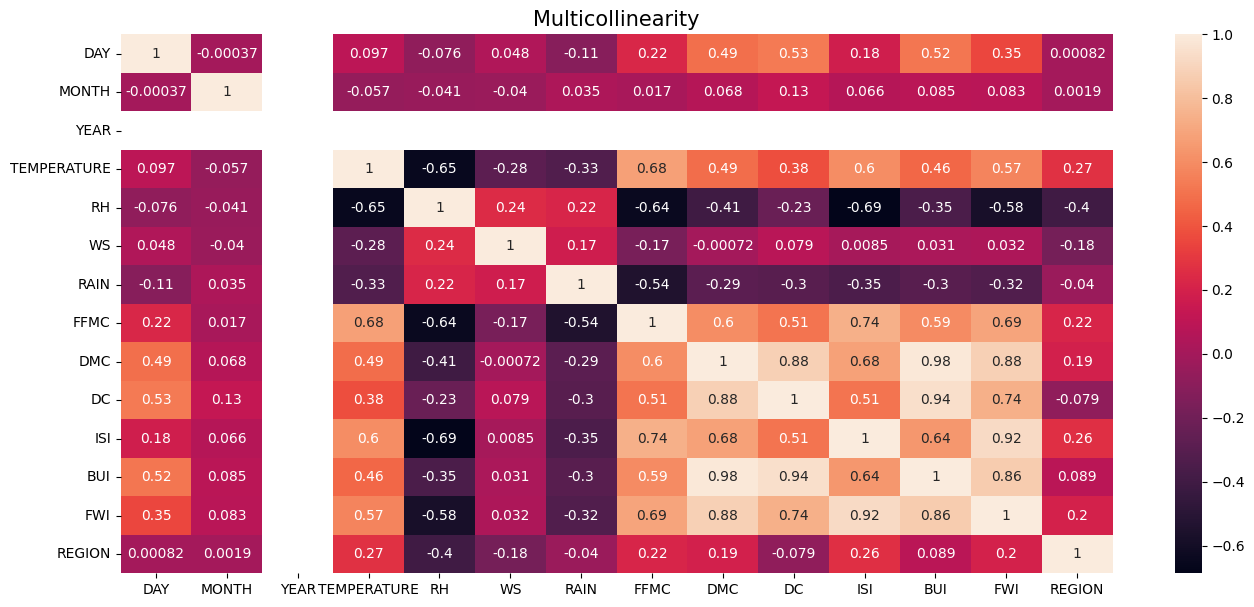

In [8]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(16, 7))
sns.heatmap(corr, annot=True)
plt.title("Multicollinearity", fontsize=15)
plt.show()

## Monthwise Fire Analysis

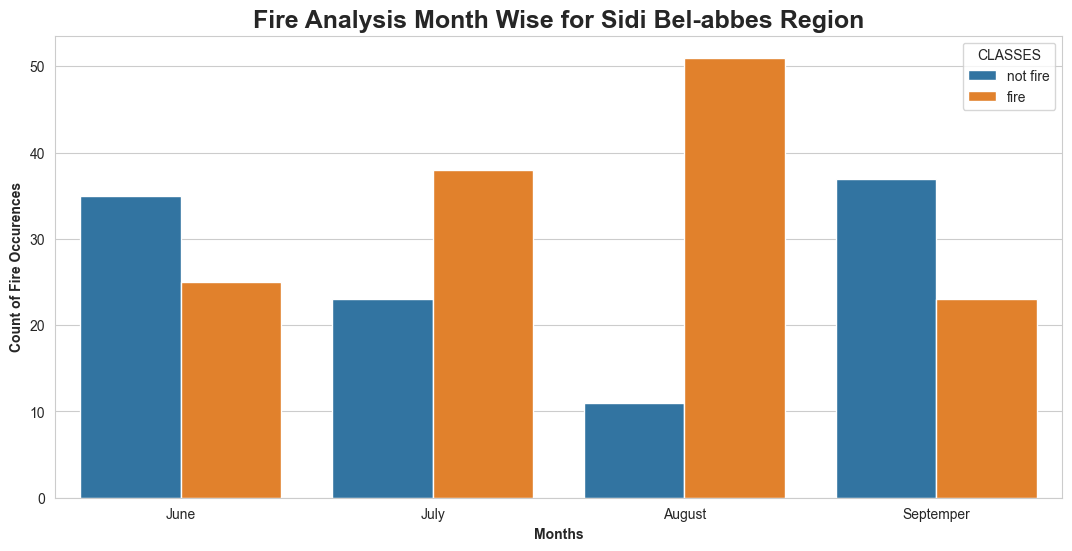

In [9]:
temp = df[df["REGION"] == 1]["TEMPERATURE"]
plt.figure(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x="MONTH", data=df, hue="CLASSES")
plt.title("Fire Analysis Month Wise for Sidi Bel-abbes Region", fontsize=18, weight="bold")
plt.ylabel("Count of Fire Occurences", weight="bold")
plt.xlabel("Months", weight="bold")
plt.xticks(np.arange(4), ["June", "July", "August", "Septemper"])
plt.show()


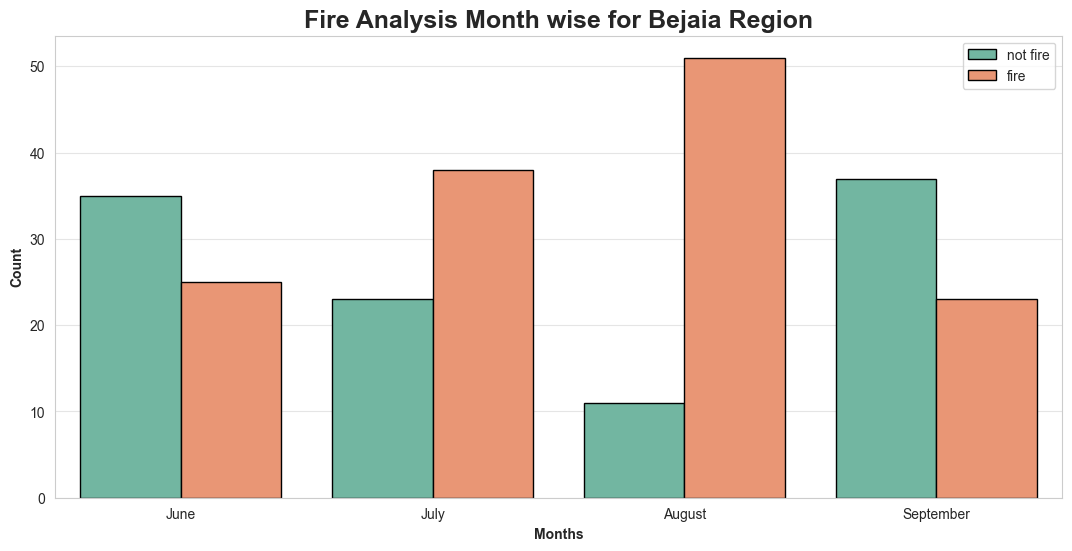

In [12]:
# Monthwise Fire Analysis

dftemp= df.loc[df['REGION']== 1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='MONTH',hue='CLASSES',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()


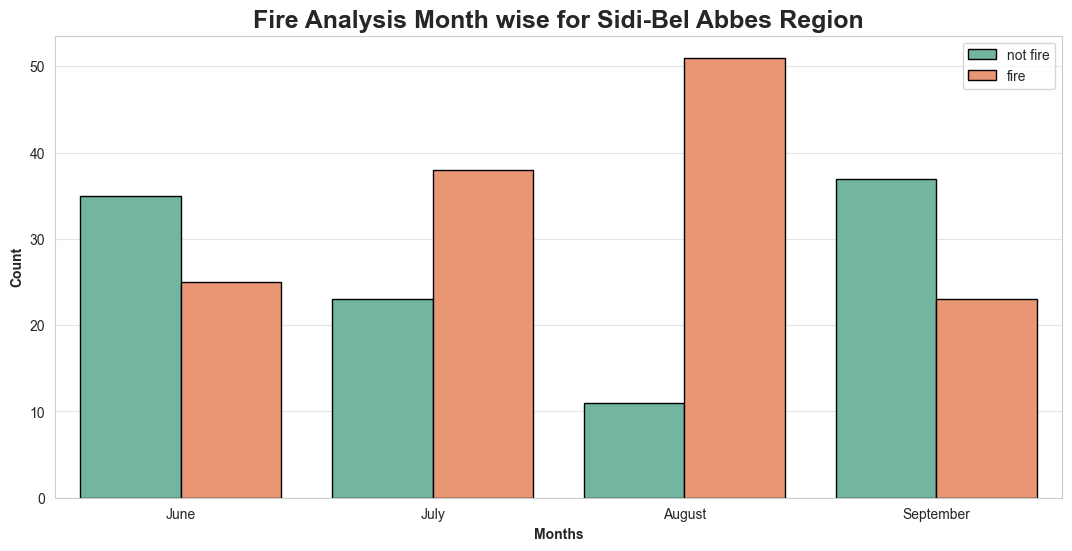

In [13]:
dftemp= df.loc[df['REGION']== 2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='MONTH',hue='CLASSES',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()